In [5]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading the Dataset
df = pd.read_csv("C:/Users/JULIET/Desktop/Mall_Customers_Dataset.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
# Check data types of each column
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [10]:
# A summary statistics of the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


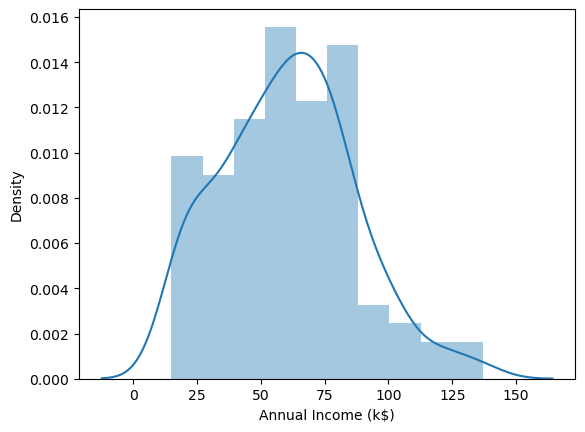

In [11]:
sns.distplot(df['Annual Income (k$)']);

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

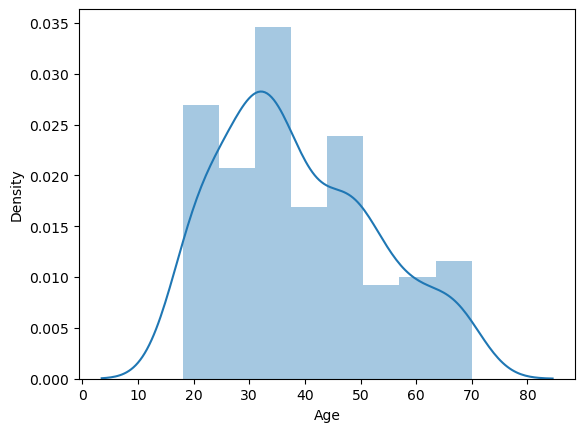

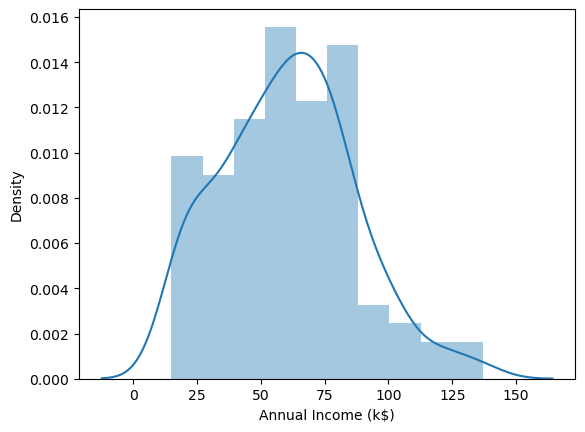

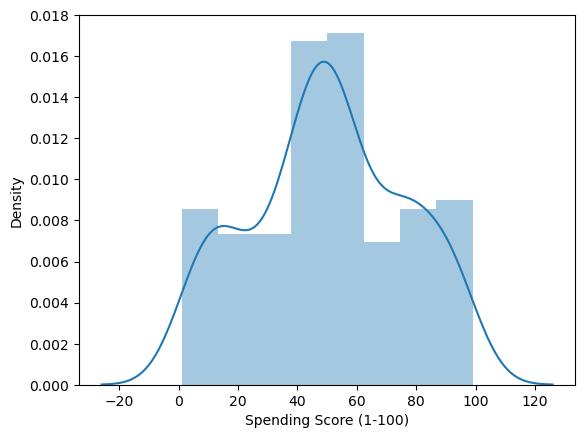

In [13]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

In [14]:
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [15]:
print(df[['Annual Income (k$)', 'Gender']].isnull().sum())


Annual Income (k$)    0
Gender                0
dtype: int64


In [16]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces
print(df.columns)  # Check column names


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [17]:
print(df['Gender'].dtype)  # Check data type


object


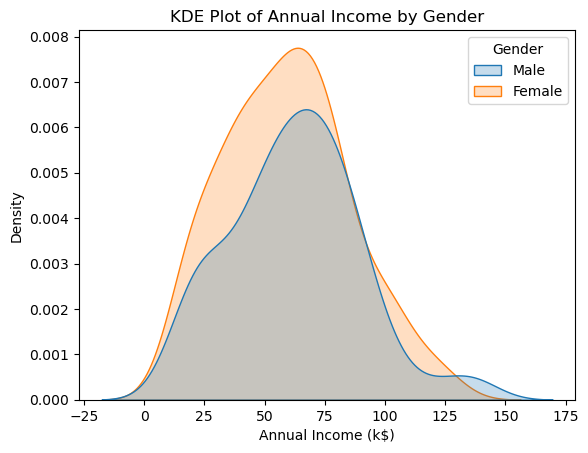

In [18]:
#Customer Annual distribution by Gender
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)
plt.title("KDE Plot of Annual Income by Gender")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")
plt.show()


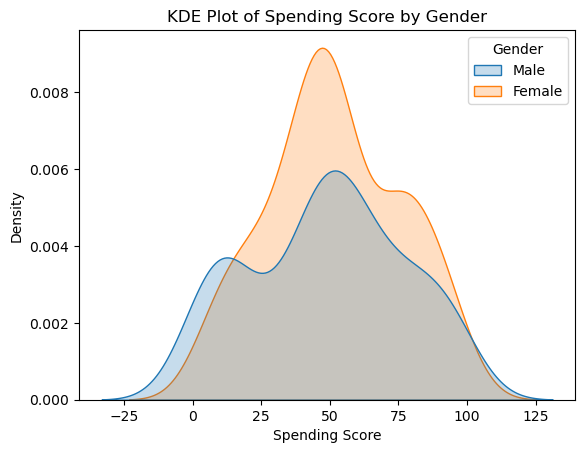

In [19]:
#customer spending score distribution by gender
sns.kdeplot(data=df, x='Spending Score (1-100)', hue='Gender', shade=True)
plt.title("KDE Plot of Spending Score by Gender")
plt.xlabel("Spending Score")
plt.ylabel("Density")
plt.show()

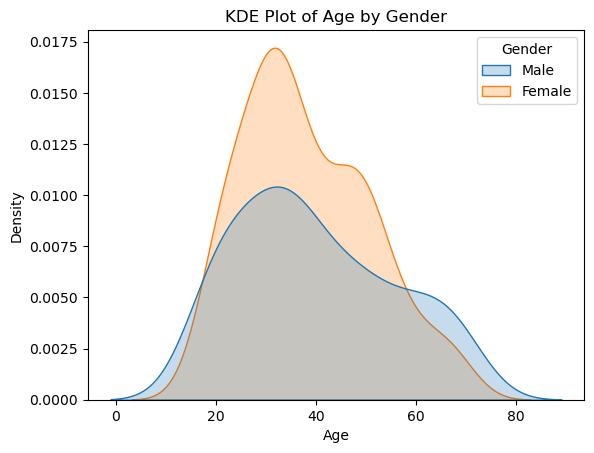

In [20]:
#Distribution of customer Age by Gender
sns.kdeplot(data=df, x='Age', hue='Gender', shade=True)
plt.title("KDE Plot of Age by Gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

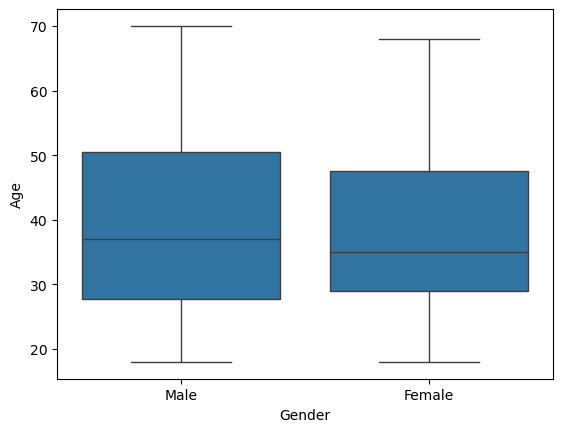

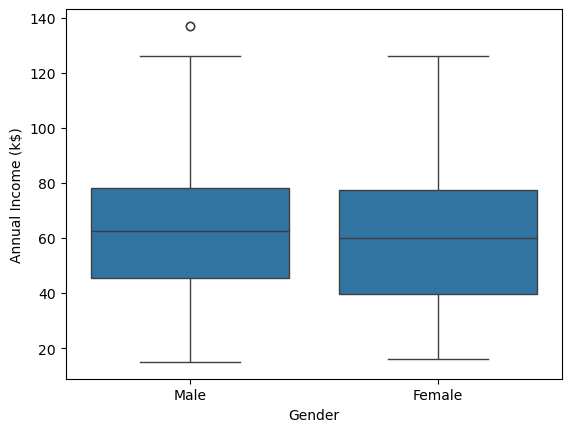

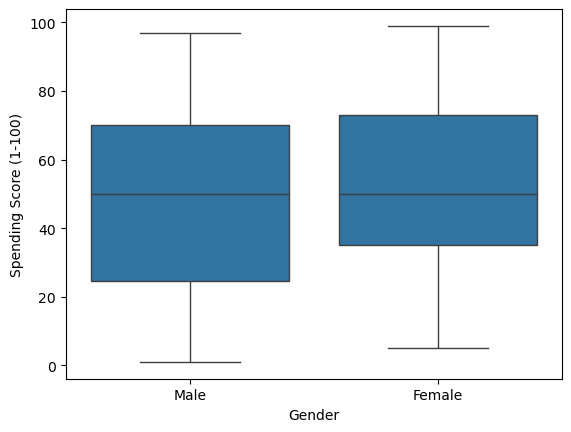

In [21]:
#Investigation into customer data distribution by Gender
#showing the spread, median, outliers
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [22]:
# Investigating into the total number of male and female customers
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [23]:
#Percentage of male and female customers
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

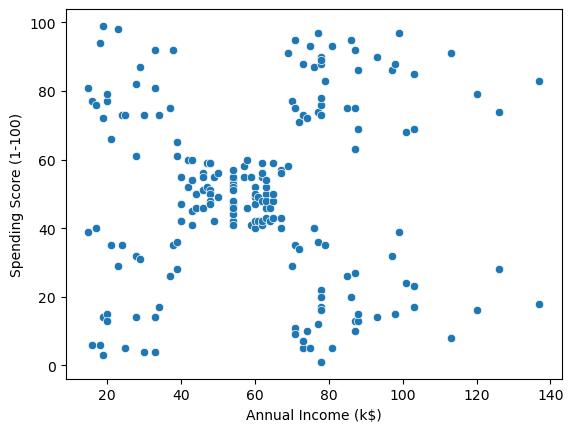

In [24]:
#Bivariate Analysis
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

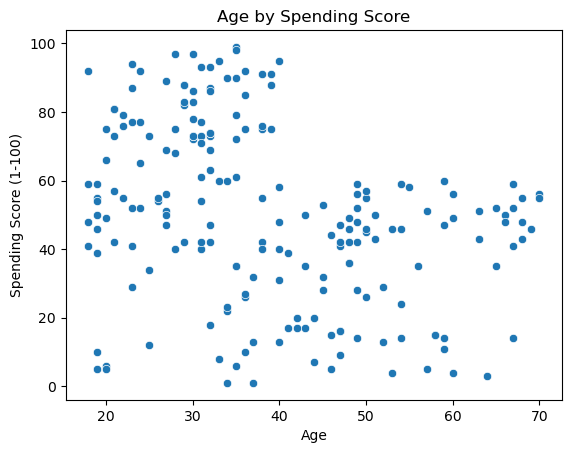

<Figure size 1000x800 with 0 Axes>

In [25]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
plt.title('Age by Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()
plt.figure(figsize=(10, 8))
plt.savefig('clustering_bivaraiate.png')

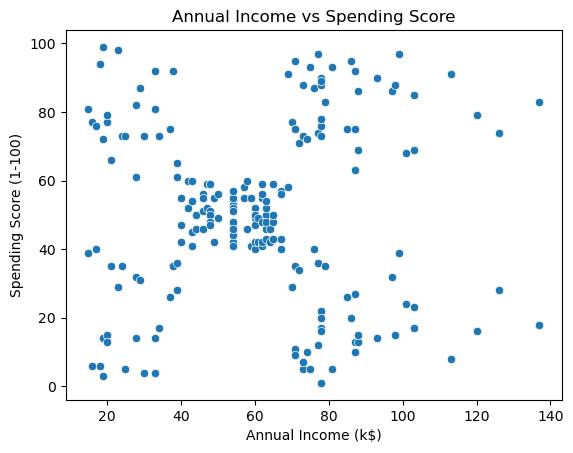

In [26]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


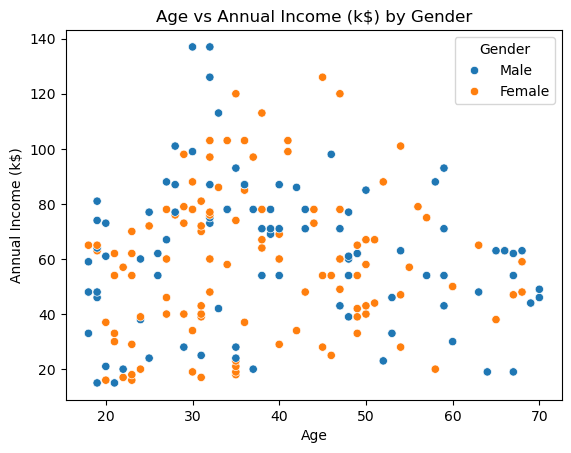

In [27]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.title('Age vs Annual Income (k$) by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


In [28]:
#checking for the Gender mean values
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [29]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


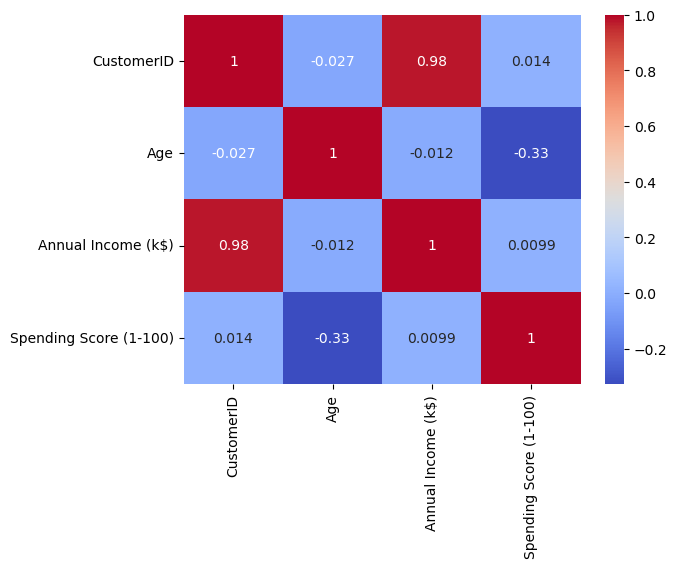

<Figure size 640x480 with 0 Axes>

In [30]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()
plt.savefig('clustering_bivaraiate.png')

In [31]:
#Clustering Univariate, Bivariate and Multivariate
clustering1 = KMeans(n_clusters=3)

In [32]:
clustering1.fit(df[['Annual Income (k$)']])  

KMeans(n_clusters=3)

In [33]:
KMeans()

KMeans()

In [34]:
clustering1. labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [35]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [36]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [37]:
clustering1.inertia_

23517.33093093093

In [38]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [39]:
intertia_scores

[137277.28000000006,
 49761.73701298703,
 23528.15217391306,
 14647.235170393062,
 9407.908188585603,
 7503.535802672825,
 3989.7157894736847,
 3522.3214285714275,
 2189.2563714063717,
 1734.1677489177496]

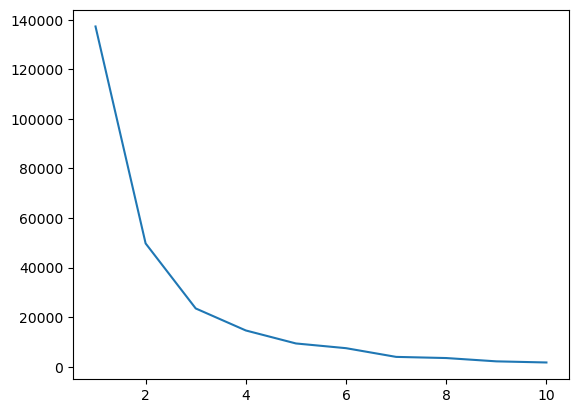

In [40]:
plt.plot(range(1,11),intertia_scores)

In [41]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [42]:
#checking the mean for the clusters
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [43]:
#Bivariate clustering to understand the relationship between annual income and spending score
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,4


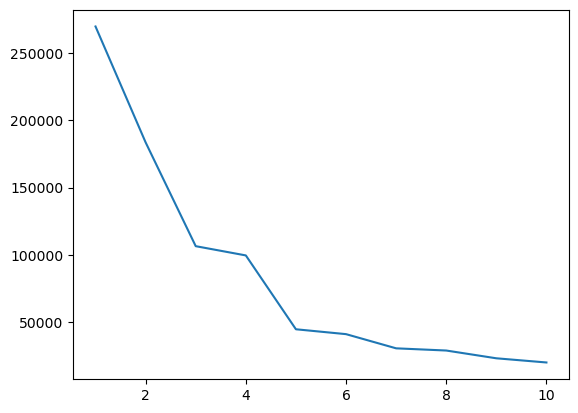

In [44]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [45]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.colums=['x','y']

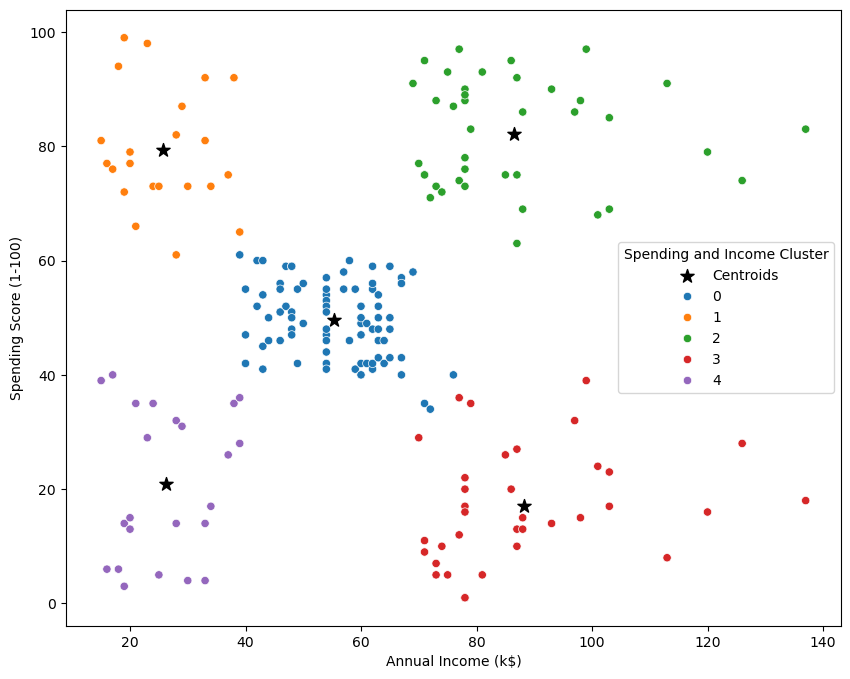

In [46]:
centers.columns = ['Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(10, 8))
plt.scatter(x=centers['Annual Income (k$)'],y=centers['Spending Score (1-100)'],s=100,c='black',marker='*', 
    label='Centroids')
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Spending and Income Cluster', 
    palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [47]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [48]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [49]:
#Multivariate Clustering
from sklearn.preprocessing import StandardScaler

In [50]:
scale = StandardScaler()

In [51]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,4


In [52]:
dff = pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,1,19,15,39,1,4,False,True
1,2,21,15,81,1,1,False,True
2,3,20,16,6,1,4,True,False
3,4,23,16,77,1,1,True,False
4,5,31,17,40,1,4,True,False


In [53]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,1,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,1,False
4,5,31,17,40,1,4,False


In [54]:

dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [55]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [56]:
dff = scale.fit_transform(dff)

In [57]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


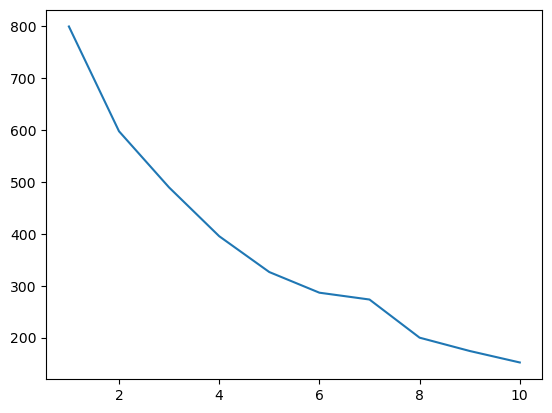

In [58]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [59]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,2
196,197,Female,45,126,28,0,3
197,198,Male,32,126,74,0,2
198,199,Male,32,137,18,0,3


In [60]:
df.to_csv('Clustering.csv')